In [1]:
import sys
sys.path.append("/home/hengtian/lucy/get_factor_tools/")
import get_factor_tools as gft

import datetime
import time
import sys
import pymysql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sys.path.append(r'/home/hengtian/lucy/factor-analyzer-v4/')

from src import data 
from src import analyzer

In [2]:
db = gft.Database('repo')

In [3]:
sql = "select trade_date, stock_code,chg_pct,deal_amount,turnover_value from stock_daily_market_data where trade_date>='{}' and trade_date<='{}'".format('2016-01-01', '2021-06-22')
db.cursor.execute(sql)
res = db.cursor.fetchall() 

In [7]:
df = pd.DataFrame(list(res), columns=['date', 'stock_code', 'chg_pct','deal_amount','turnover_value'])
df['avg_deal_amount'] = df['turnover_value']/df['deal_amount']
df.loc[df['turnover_value'] == 0,'avg_deal_amount'] = np.nan
df.loc[df['turnover_value'] == 0,'chg_pct'] = np.nan

In [9]:
df.to_csv("ideal_chart.csv")

In [8]:
df

,date,stock_code,chg_pct,deal_amount,turnover_value,avg_deal_amount
0,2016-01-04,000001.XSHE,-0.0550,24835,6.603762e+08,26590.543713
1,2016-01-05,000001.XSHE,0.0062,29217,7.555314e+08,25859.306353
2,2016-01-06,000001.XSHE,0.0114,20359,5.916985e+08,29063.240845
3,2016-01-07,000001.XSHE,-0.0512,6596,1.948695e+08,29543.586032
4,2016-01-08,000001.XSHE,0.0165,29002,8.313345e+08,28664.731613
...,...,...,...,...,...,...
4749502,2021-06-22,002965.XSHE,0.0170,3172,4.231353e+07,13339.699855
4749503,2021-06-22,000670.XSHE,NaN,0,0.000000e+00,NaN
4749504,2021-06-22,000792.XSHE,NaN,0,0.000000e+00,NaN
4749505,2021-06-22,002260.XSHE,NaN,0,0.000000e+00,NaN


In [10]:
data = pd.read_csv("ideal_chart.csv", index_col=0)

/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
pct = pd.pivot_table(data, values='chg_pct', index='date', columns='stock_code', dropna=True).sort_index()
avg = pd.pivot_table(data, values='avg_deal_amount', index='date', columns='stock_code',dropna=True).sort_index()
# amount = pd.DataFrame(,index=value.index, columns = stocks)

In [14]:
avg

stock_code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,900945.XSHG,900946.XSHG,900947.XSHG,900948.XSHG,900951.XSHG,900952.XSHG,900953.XSHG,900955.XSHG,900956.XSHG,900957.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000038,NaN,0.000033,0.000095,0.000037,NaN,0.000085,0.000041,0.000060,0.000060,...,0.000681,0.000580,0.000559,0.000418,0.000388,0.000617,0.000415,0.000569,0.000337,0.000409
2016-01-05,0.000039,NaN,0.000031,0.000080,0.000041,NaN,0.000077,0.000045,0.000063,0.000060,...,0.000529,0.000651,0.000564,0.000390,0.000390,0.000734,0.000353,0.000556,0.000331,0.000356
2016-01-06,0.000034,NaN,0.000041,0.000082,0.000044,NaN,0.000082,0.000046,0.000062,0.000062,...,0.000540,0.000537,0.000488,0.000378,0.000394,0.000605,0.000414,0.000622,0.000340,0.000377
2016-01-07,0.000034,NaN,0.000044,0.000080,0.000048,NaN,0.000088,0.000040,0.000068,0.000065,...,0.000439,0.000564,0.000453,0.000340,0.000386,0.000768,0.000432,0.000559,0.000308,0.000378
2016-01-08,0.000035,NaN,0.000044,0.000091,0.000044,NaN,0.000078,0.000042,0.000066,0.000061,...,0.000628,0.000535,0.000591,0.000346,0.000416,0.000855,0.000380,0.000515,0.000332,0.000366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,0.000048,0.000047,0.000112,0.000114,0.000137,0.000104,0.000151,0.000103,0.000121,0.000077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18,0.000055,0.000043,0.000117,0.000130,0.000127,0.000119,0.000169,0.000083,0.000164,0.000099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-19,0.000043,0.000053,0.000115,0.000124,0.000116,0.000096,0.000160,0.000077,0.000123,0.000106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pct

stock_code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,900945.XSHG,900946.XSHG,900947.XSHG,900948.XSHG,900951.XSHG,900952.XSHG,900953.XSHG,900955.XSHG,900956.XSHG,900957.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.0550,NaN,-0.1000,-0.0996,-0.0982,NaN,-0.0993,-0.1002,-0.0990,-0.0999,...,-0.0469,-0.0795,-0.0570,-0.0713,-0.1001,-0.0483,-0.0976,-0.0790,-0.0998,-0.0997
2016-01-05,0.0062,NaN,-0.0637,-0.0155,-0.0328,NaN,0.0189,-0.0470,-0.0560,-0.0421,...,0.0299,0.0247,0.0178,0.0472,0.0080,0.0131,0.0310,0.0134,0.0098,0.0113
2016-01-06,0.0114,NaN,0.0129,0.0315,0.0259,NaN,0.0139,0.0364,0.0407,0.0224,...,0.0130,0.0310,0.0122,0.0643,-0.0036,0.0016,-0.0046,0.0198,0.0036,-0.0119
2016-01-07,-0.0512,NaN,-0.1001,-0.0991,-0.1000,NaN,-0.0885,-0.1003,-0.0996,-0.1000,...,-0.0358,-0.0701,-0.0415,-0.0858,-0.0999,-0.0484,-0.0868,-0.0986,-0.0986,-0.0995
2016-01-08,0.0165,NaN,0.0062,0.0036,0.0097,NaN,-0.0020,0.0097,0.0012,0.0069,...,0.0460,0.0180,0.0198,0.0649,0.0032,0.0186,0.0187,0.0173,0.0000,0.0243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,0.0120,0.0018,0.0078,-0.0505,-0.0147,-0.0474,-0.0130,-0.0071,-0.0269,-0.0182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18,0.0127,0.0063,-0.0122,-0.0319,0.0074,-0.0221,0.0000,0.0102,-0.0025,0.0129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-19,-0.0126,-0.0191,-0.0124,0.0000,-0.0111,0.0085,-0.0044,0.0281,0.0076,-0.0183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

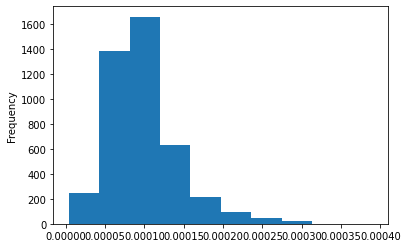

In [15]:
avg.iloc[-1].plot(kind="hist")

In [137]:
def task(stock):
    i=20
    s_avg = avg[stock]
#     print(s_avg)
    s_pct = pct[stock]
    s_m=np.full(len(pct), np.nan)
    s_h = np.full(len(pct), np.nan)
    s_l=np.full(len(pct), np.nan)
    while i<len(pct):
        if len(s_avg.iloc[i-20:i].dropna()) != 20:
            i+=1
        else:
            ss_avg = s_avg.iloc[i-20:i]
            ss_pct=s_pct.iloc[i-20:i]
            med = ss_avg.median()
            high = ss_avg[ss_avg>med].index
#             print(high)
            low =ss_avg[ss_avg<=med].index
            m_high = ss_pct.loc[high].sum()
            s_h[i] = m_high
            m_low=ss_pct.loc[low].sum()
            s_l[i]=m_low
#             print(ss_avg, med, high)
            s_m[i] = m_high-m_low
            i+=1
    return s_m,s_h,s_l
      
# test = task('000001.XSHE')
# x = np.array(test)
# x.shape

In [138]:
d = pd.DataFrame(np.empty((len(avg),avg.shape[1]),dtype=object),columns = avg.columns, index = avg.index)
d_l = pd.DataFrame(np.empty((len(avg),avg.shape[1]),dtype=object),columns = avg.columns, index = avg.index)
d_h = pd.DataFrame(np.empty((len(avg),avg.shape[1]),dtype=object),columns = avg.columns, index = avg.index)

for stock in avg.columns:
    s_m,s_h,s_l = task(stock)
    d[stock] =s_m.transpose()
    d_l[stock]=s_l.transpose()
    d_h[stock]=s_h.transpose()

In [140]:
d_l.to_csv("d_low.csv")
d_h.to_csv("d_high.csv")

In [17]:
d_h = pd.read_csv("d_high.csv", index_col=0)

Backtest from 2016-01-04 to 2021-05-10.
基准: ZZ500, 选股范围: HS300
分组数量: 5
回测进度: 2021-05-10

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


+---+----------+-----------+--------+-------+-------+----------------------------------+----------------------------------+---------+
|   | TotalRtn | AnnualRtn | Sharpe | Alpha | Beta  |       MaxDown (From ~ To)        |      AlphaDown (From ~ To)       | MeanNum |
+---+----------+-----------+--------+-------+-------+----------------------------------+----------------------------------+---------+
| 1 |  92.57%  |  13.43%   | 0.444  | 0.146 | 0.723 | 31.01% (2018-01-24 ~ 2018-10-18) | 9.27% (2018-02-06 ~ 2018-04-25)  | 56.416  |
| 2 |  84.34%  |  12.48%   | 0.444  | 0.132 | 0.656 | 30.66% (2018-01-26 ~ 2018-10-18) | 15.79% (2019-08-01 ~ 2020-06-17) | 56.408  |
| 3 |  50.68%  |   8.20%   | 0.209  | 0.092 | 0.699 | 35.38% (2018-01-24 ~ 2018-10-18) | 15.20% (2019-11-06 ~ 2020-06-17) | 56.442  |
| 4 |  13.25%  |   2.42%   | -0.072 | 0.040 | 0.775 | 37.69% (2017-09-18 ~ 2018-10-18) | 18.28% (2019-11-06 ~ 2021-05-10) | 56.408  |
| 5 |  34.41%  |   5.85%   | 0.073  | 0.083 | 0.898 | 41.47% (

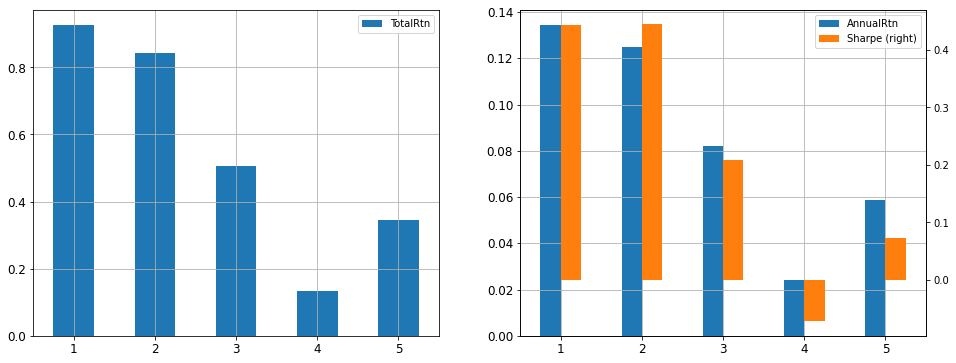

In [18]:
a = analyzer.Analyzer(file_dir=d_h.reset_index(), data_root=r'/home/hengtian/binz/factor-analyzer-v4/basic-data/')
a.target_quantile_backtest(start='2016-01-01', end='2021-05-20', hold=1, group_num=None, deciles=5,
                           ascending=False, benchmark='ZZ500', logy=False, filter_paused=True, filter_st=True, 
                           domain='HS300', fee=0.0, details=None, exact=False)

/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hengtian/anaconda3/envs/lucy/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hengtian/anaconda3/

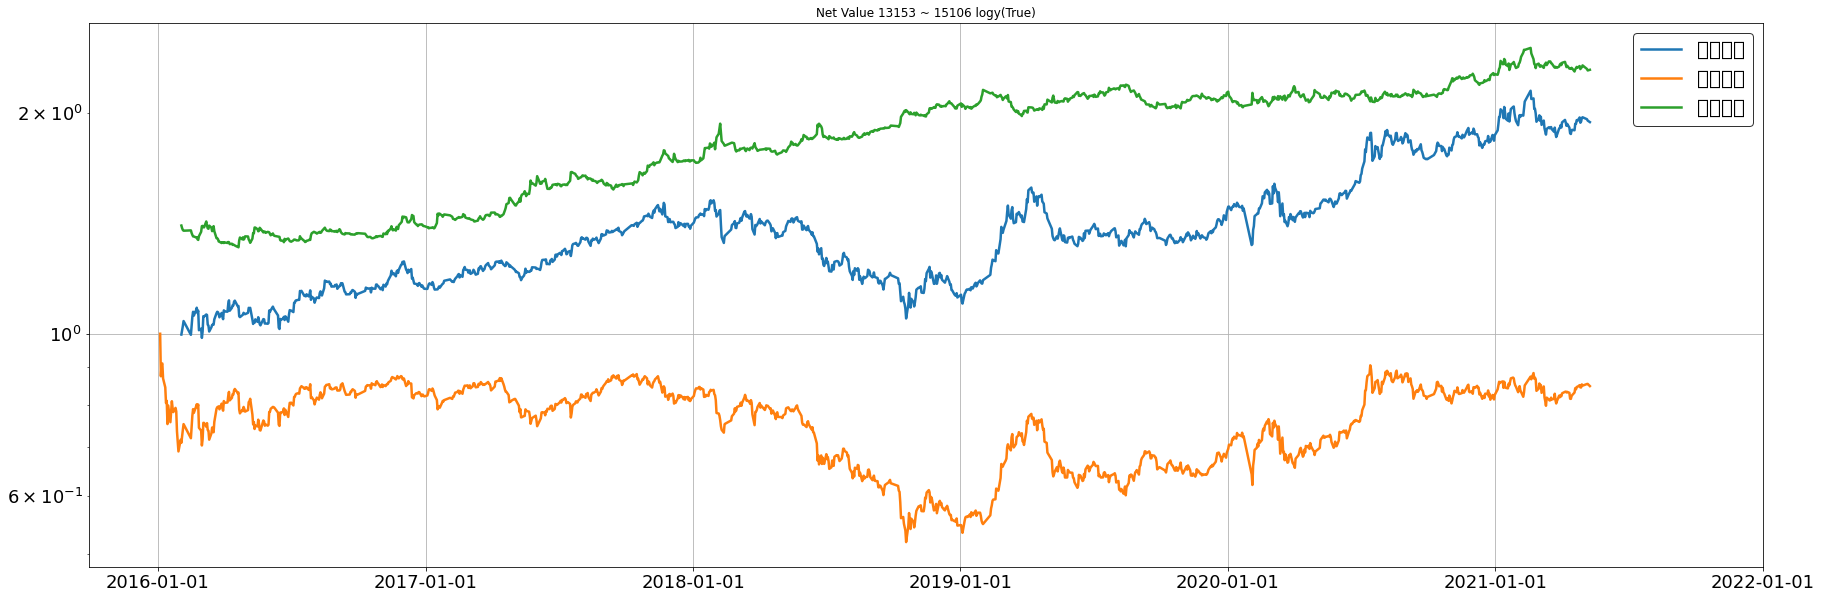

In [22]:
value_a = a.net_plot(target=[1], start=None, end=None, benchmark='ZZ500', logy=True)

<AxesSubplot:>

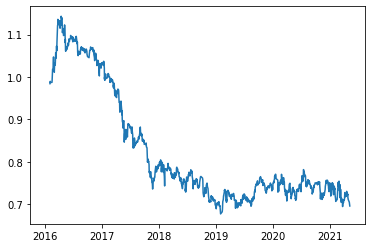

In [21]:
(value_a['5'] / value_a['1']).plot()